In [10]:
!pip install pandas matplotlib seaborn numpy

  Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 330.3 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 648.8 kB/s eta 0:00:00
  Using cached contourpy-1.3.1-cp311-cp311-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp311-cp311-win_amd64.whl.metadata (103 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
Using cached pandas-2.2.3-cp311-cp311-win_amd64.whl (11.6 MB)
Using cached matplotlib-3.10.1-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
    ---------


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Usuario\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar estilo de las gráficas
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

Cargar Datos

In [2]:
# Cargar los datos del archivo CSV
df = pd.read_csv('resultadosMejorados.csv')

# Mostrar un resumen de los datos
print("Información del conjunto de datos:")
print(f"Número de corridas: {len(df)}")
print("\nResumen estadístico:")
df.describe()

Información del conjunto de datos:
Número de corridas: 30

Resumen estadístico:


,corrida,fitness,tiempo_ejecucion,interaccion,calificacion_blosum,memoria_usado_pct
count,30.000000,30.000,30.000000,30.000000,30.0,30.000000
mean,15.500000,26.082,2.534314,0.886667,13.0,77.910000
std,8.803408,0.000,0.109826,0.034575,0.0,0.198876
min,1.000000,26.082,2.351221,0.800000,13.0,77.600000
25%,8.250000,26.082,2.466795,0.900000,13.0,77.700000
50%,15.500000,26.082,2.523827,0.900000,13.0,77.900000
75%,22.750000,26.082,2.569353,0.900000,13.0,78.000000
max,30.000000,26.082,2.812536,0.900000,13.0,78.300000


Gráfica de línea para fitness

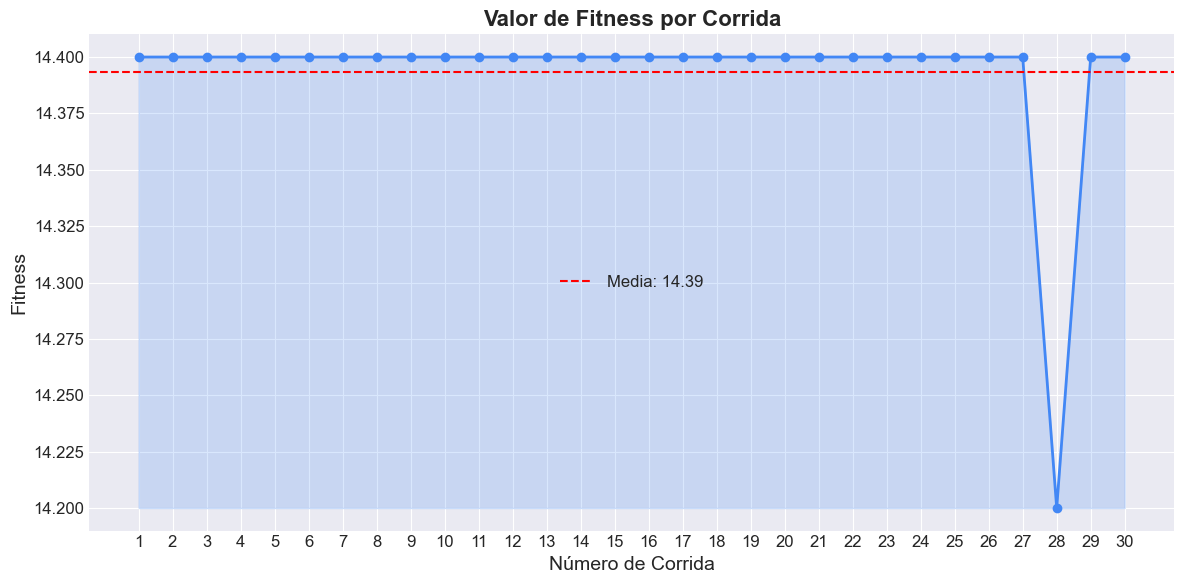

In [13]:
# Gráfica de línea para fitness
plt.figure(figsize=(12, 6))
plt.plot(df['corrida'], df['fitness'], marker='o', linestyle='-', linewidth=2, color='#4287f5')
plt.axhline(y=df['fitness'].mean(), color='red', linestyle='--', label=f'Media: {df["fitness"].mean():.2f}')
plt.fill_between(df['corrida'], df['fitness'].min(), df['fitness'], alpha=0.2, color='#4287f5')
plt.title('Valor de Fitness por Corrida', fontsize=16, fontweight='bold')
plt.xlabel('Número de Corrida', fontsize=14)
plt.ylabel('Fitness', fontsize=14)
plt.grid(True)
plt.xticks(df['corrida'])
plt.legend()
plt.tight_layout()
plt.savefig('fitness_linea.png', dpi=300)
plt.show()

Gráfica de barras para fitness

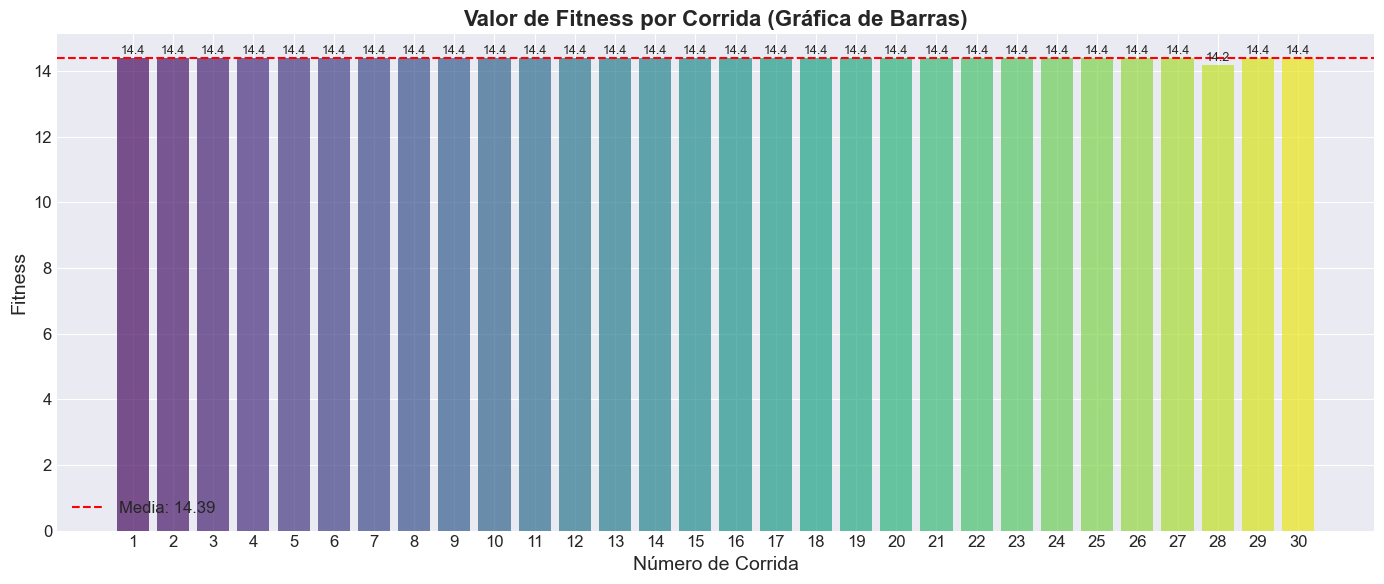

In [14]:
# Gráfica de barras para fitness
plt.figure(figsize=(14, 6))
bars = plt.bar(df['corrida'], df['fitness'], alpha=0.7, color=sns.color_palette("viridis", len(df)))
plt.axhline(y=df['fitness'].mean(), color='red', linestyle='--', label=f'Media: {df["fitness"].mean():.2f}')

# Añadir etiquetas a las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height+0.02, f'{height:.1f}', 
             ha='center', va='bottom', fontsize=9)

plt.title('Valor de Fitness por Corrida (Gráfica de Barras)', fontsize=16, fontweight='bold')
plt.xlabel('Número de Corrida', fontsize=14)
plt.ylabel('Fitness', fontsize=14)
plt.grid(True, axis='y')
plt.xticks(df['corrida'])
plt.legend()
plt.tight_layout()
plt.savefig('fitness_barras.png', dpi=300)
plt.show()

Gráfica de línea para tiempo de ejecución

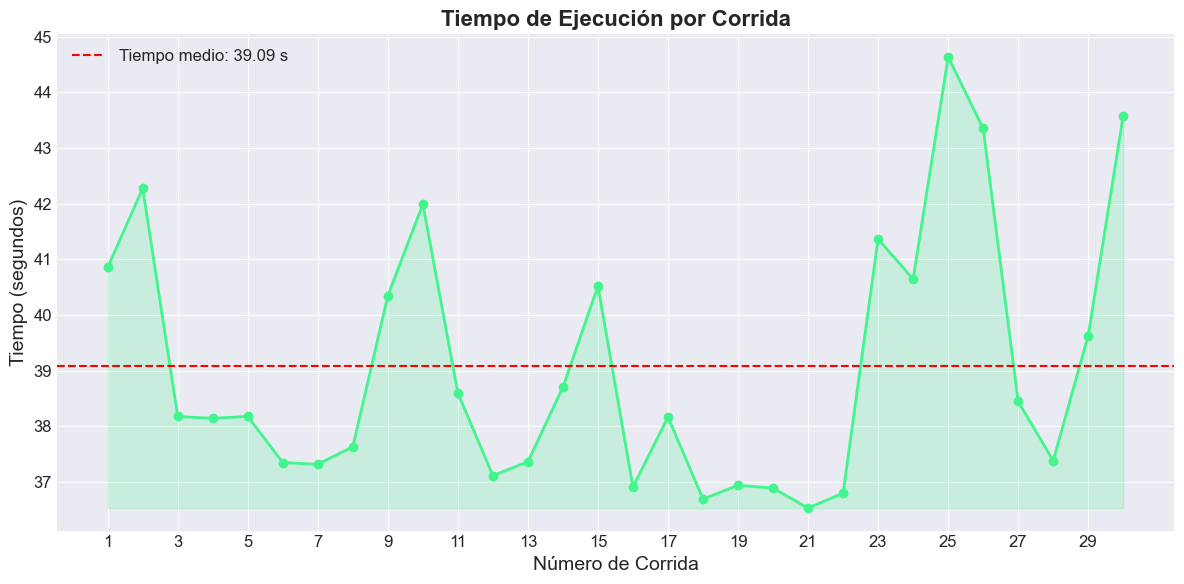

In [15]:
# Gráfica de línea para tiempo de ejecución
plt.figure(figsize=(12, 6))
plt.plot(df['corrida'], df['tiempo_ejecucion'], marker='o', linestyle='-', linewidth=2, color='#42f58d')
plt.axhline(y=df['tiempo_ejecucion'].mean(), color='red', linestyle='--', 
            label=f'Tiempo medio: {df["tiempo_ejecucion"].mean():.2f} s')
plt.fill_between(df['corrida'], df['tiempo_ejecucion'].min(), df['tiempo_ejecucion'], alpha=0.2, color='#42f58d')
plt.title('Tiempo de Ejecución por Corrida', fontsize=16, fontweight='bold')
plt.xlabel('Número de Corrida', fontsize=14)
plt.ylabel('Tiempo (segundos)', fontsize=14)
plt.grid(True)
plt.xticks(df['corrida'][::2])  # Mostrar cada segundo número para no sobrecargar el eje x
plt.legend()
plt.tight_layout()
plt.savefig('tiempo_ejecucion_linea.png', dpi=300)
plt.show()

Boxplot para tiempo de ejecución

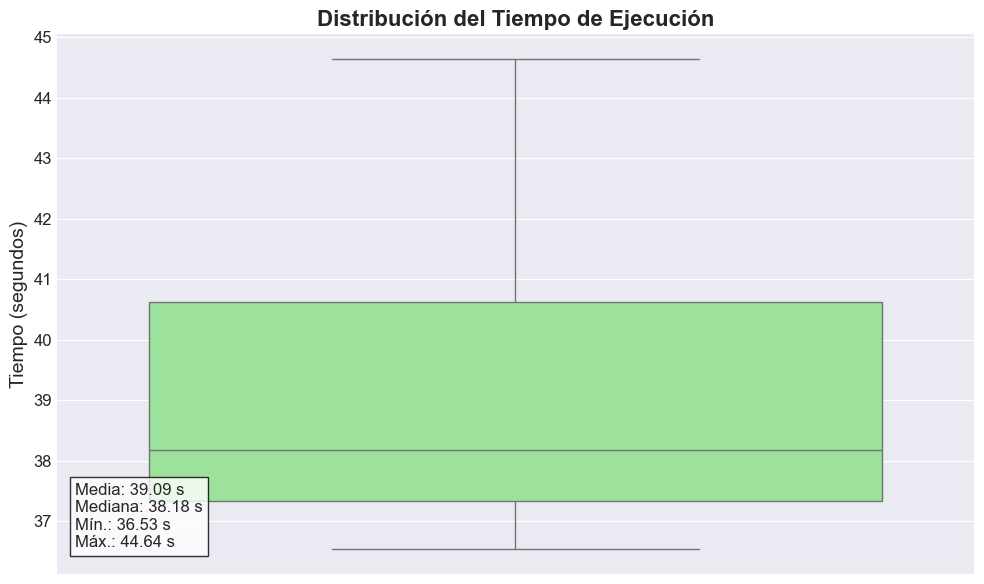

In [16]:
# Boxplot para tiempo de ejecución
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['tiempo_ejecucion'], color='lightgreen')
plt.title('Distribución del Tiempo de Ejecución', fontsize=16, fontweight='bold')
plt.ylabel('Tiempo (segundos)', fontsize=14)
plt.grid(True, axis='y')

# Añadir estadísticas al gráfico
stats_text = (f"Media: {df['tiempo_ejecucion'].mean():.2f} s\n"
              f"Mediana: {df['tiempo_ejecucion'].median():.2f} s\n"
              f"Mín.: {df['tiempo_ejecucion'].min():.2f} s\n"
              f"Máx.: {df['tiempo_ejecucion'].max():.2f} s")
plt.text(0.02, 0.05, stats_text, transform=plt.gca().transAxes, fontsize=12,
        bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('tiempo_ejecucion_boxplot.png', dpi=300)
plt.show()

Gráfica de línea para interacción

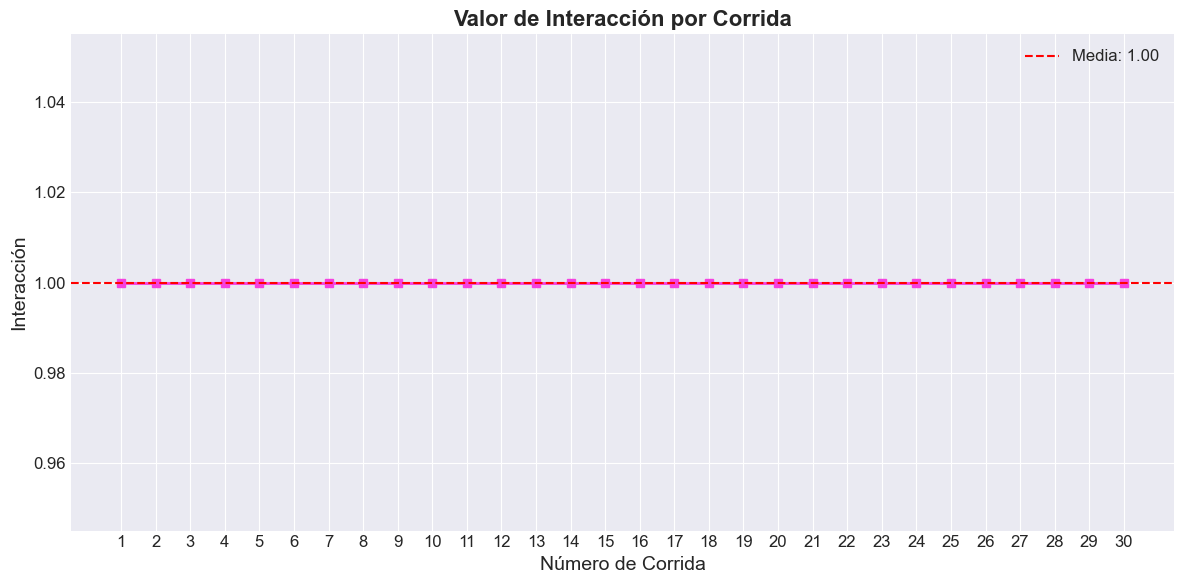

In [17]:
# Gráfica de línea para interacción
plt.figure(figsize=(12, 6))
plt.plot(df['corrida'], df['interaccion'], marker='s', linestyle='-', linewidth=2, color='#f542e0')
plt.axhline(y=df['interaccion'].mean(), color='red', linestyle='--', label=f'Media: {df["interaccion"].mean():.2f}')
plt.fill_between(df['corrida'], df['interaccion'].min(), df['interaccion'], alpha=0.2, color='#f542e0')
plt.title('Valor de Interacción por Corrida', fontsize=16, fontweight='bold')
plt.xlabel('Número de Corrida', fontsize=14)
plt.ylabel('Interacción', fontsize=14)
plt.grid(True)
plt.xticks(df['corrida'])
plt.legend()
plt.tight_layout()
plt.savefig('interaccion_linea.png', dpi=300)
plt.show()

Histograma para interacción

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1388\1626422742.py:6: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df['interaccion'], color='red', label='Densidad')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_1388\1626422742.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


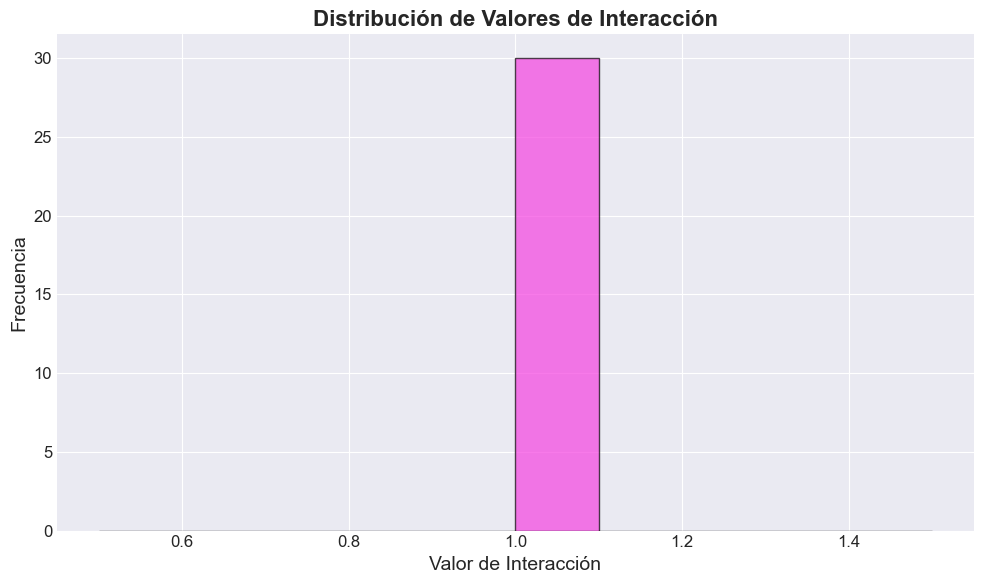

In [18]:
# Histograma para interacción
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['interaccion'], bins=10, alpha=0.7, color='#f542e0', edgecolor='black')

# Agregar una línea de densidad
sns.kdeplot(df['interaccion'], color='red', label='Densidad')

plt.title('Distribución de Valores de Interacción', fontsize=16, fontweight='bold')
plt.xlabel('Valor de Interacción', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)
plt.grid(True, axis='y')
plt.legend()
plt.tight_layout()
plt.savefig('interaccion_histograma.png', dpi=300)
plt.show()

Gráfica de línea para calificación BLOSUM

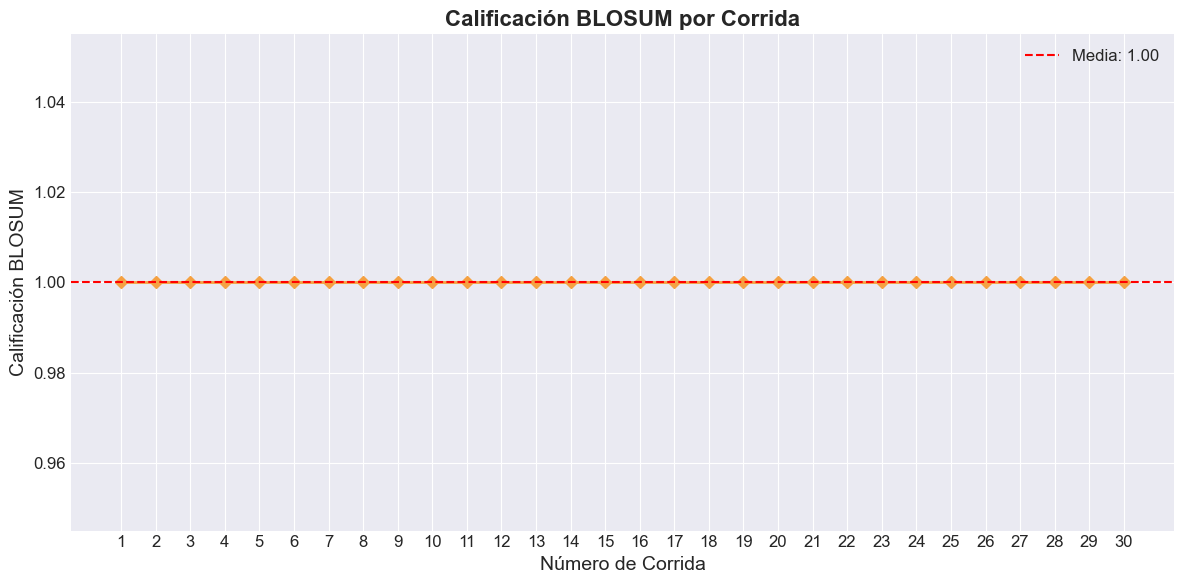

In [19]:
# Gráfica de línea para calificación BLOSUM
plt.figure(figsize=(12, 6))
plt.plot(df['corrida'], df['calificacion_blosum'], marker='D', linestyle='-', linewidth=2, color='#f5a142')
plt.axhline(y=df['calificacion_blosum'].mean(), color='red', linestyle='--', 
            label=f'Media: {df["calificacion_blosum"].mean():.2f}')
plt.fill_between(df['corrida'], df['calificacion_blosum'].min(), df['calificacion_blosum'], 
                 alpha=0.2, color='#f5a142')
plt.title('Calificación BLOSUM por Corrida', fontsize=16, fontweight='bold')
plt.xlabel('Número de Corrida', fontsize=14)
plt.ylabel('Calificación BLOSUM', fontsize=14)
plt.grid(True)
plt.xticks(df['corrida'])
plt.legend()
plt.tight_layout()
plt.savefig('blosum_linea.png', dpi=300)
plt.show()

Gráfica de dispersión para calificación BLOSUM

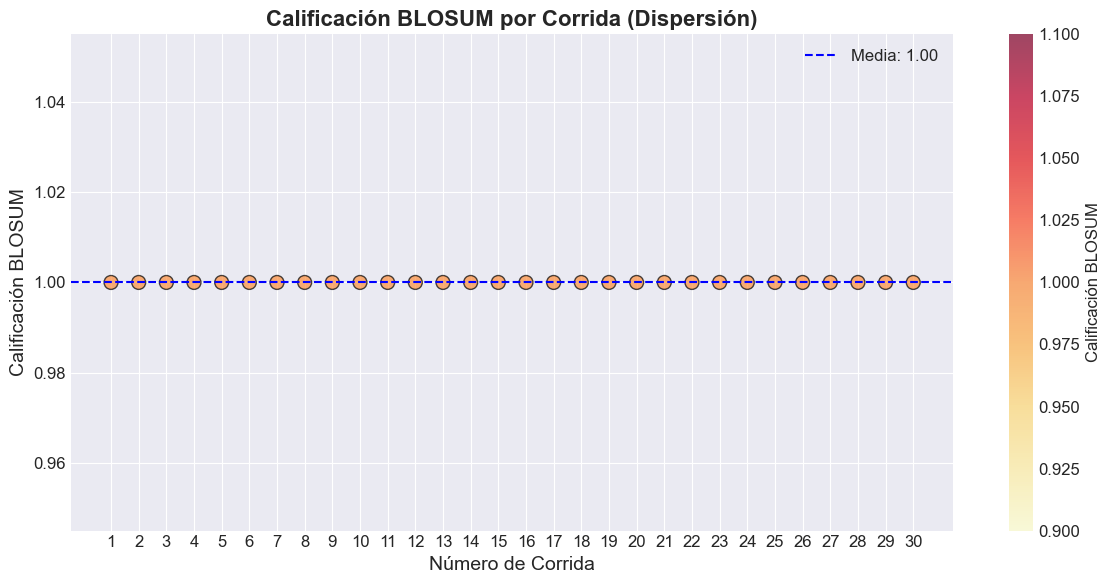

In [20]:
# Gráfica de dispersión para calificación BLOSUM
plt.figure(figsize=(12, 6))
plt.scatter(df['corrida'], df['calificacion_blosum'], s=100, c=df['calificacion_blosum'], 
            cmap='YlOrRd', alpha=0.7, edgecolors='black')
plt.colorbar(label='Calificación BLOSUM')
plt.axhline(y=df['calificacion_blosum'].mean(), color='blue', linestyle='--', 
            label=f'Media: {df["calificacion_blosum"].mean():.2f}')
plt.title('Calificación BLOSUM por Corrida (Dispersión)', fontsize=16, fontweight='bold')
plt.xlabel('Número de Corrida', fontsize=14)
plt.ylabel('Calificación BLOSUM', fontsize=14)
plt.grid(True)
plt.xticks(df['corrida'])
plt.legend()
plt.tight_layout()
plt.savefig('blosum_scatter.png', dpi=300)
plt.show()

Matriz de correlación

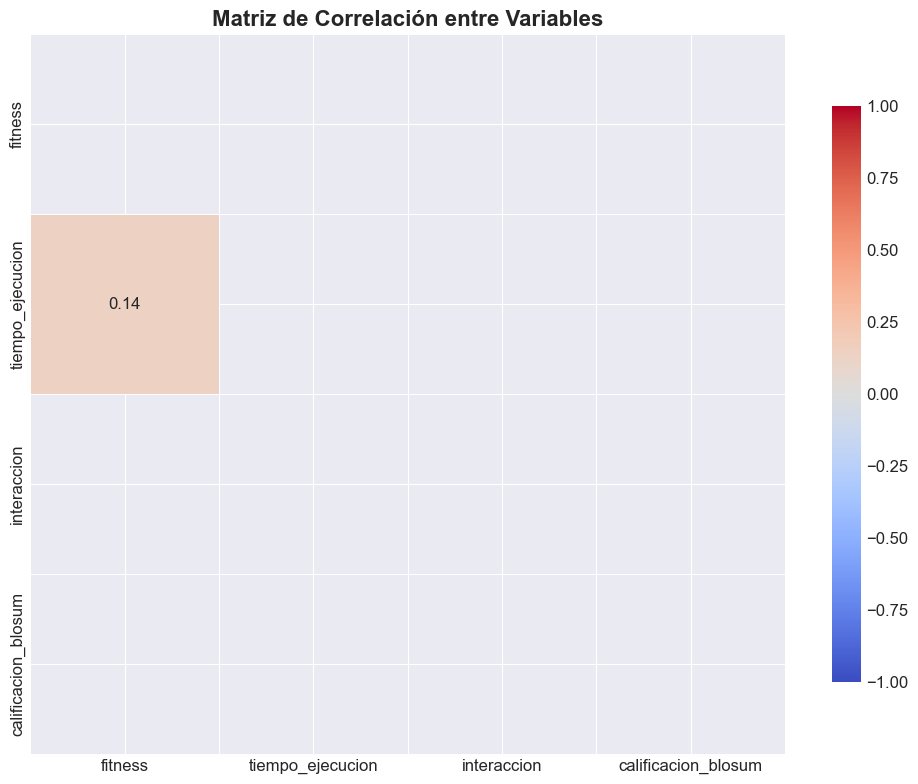

In [21]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
correlation_matrix = df.drop('corrida', axis=1).corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, 
            linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación entre Variables', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('matriz_correlacion.png', dpi=300)
plt.show()

Dashboard Final

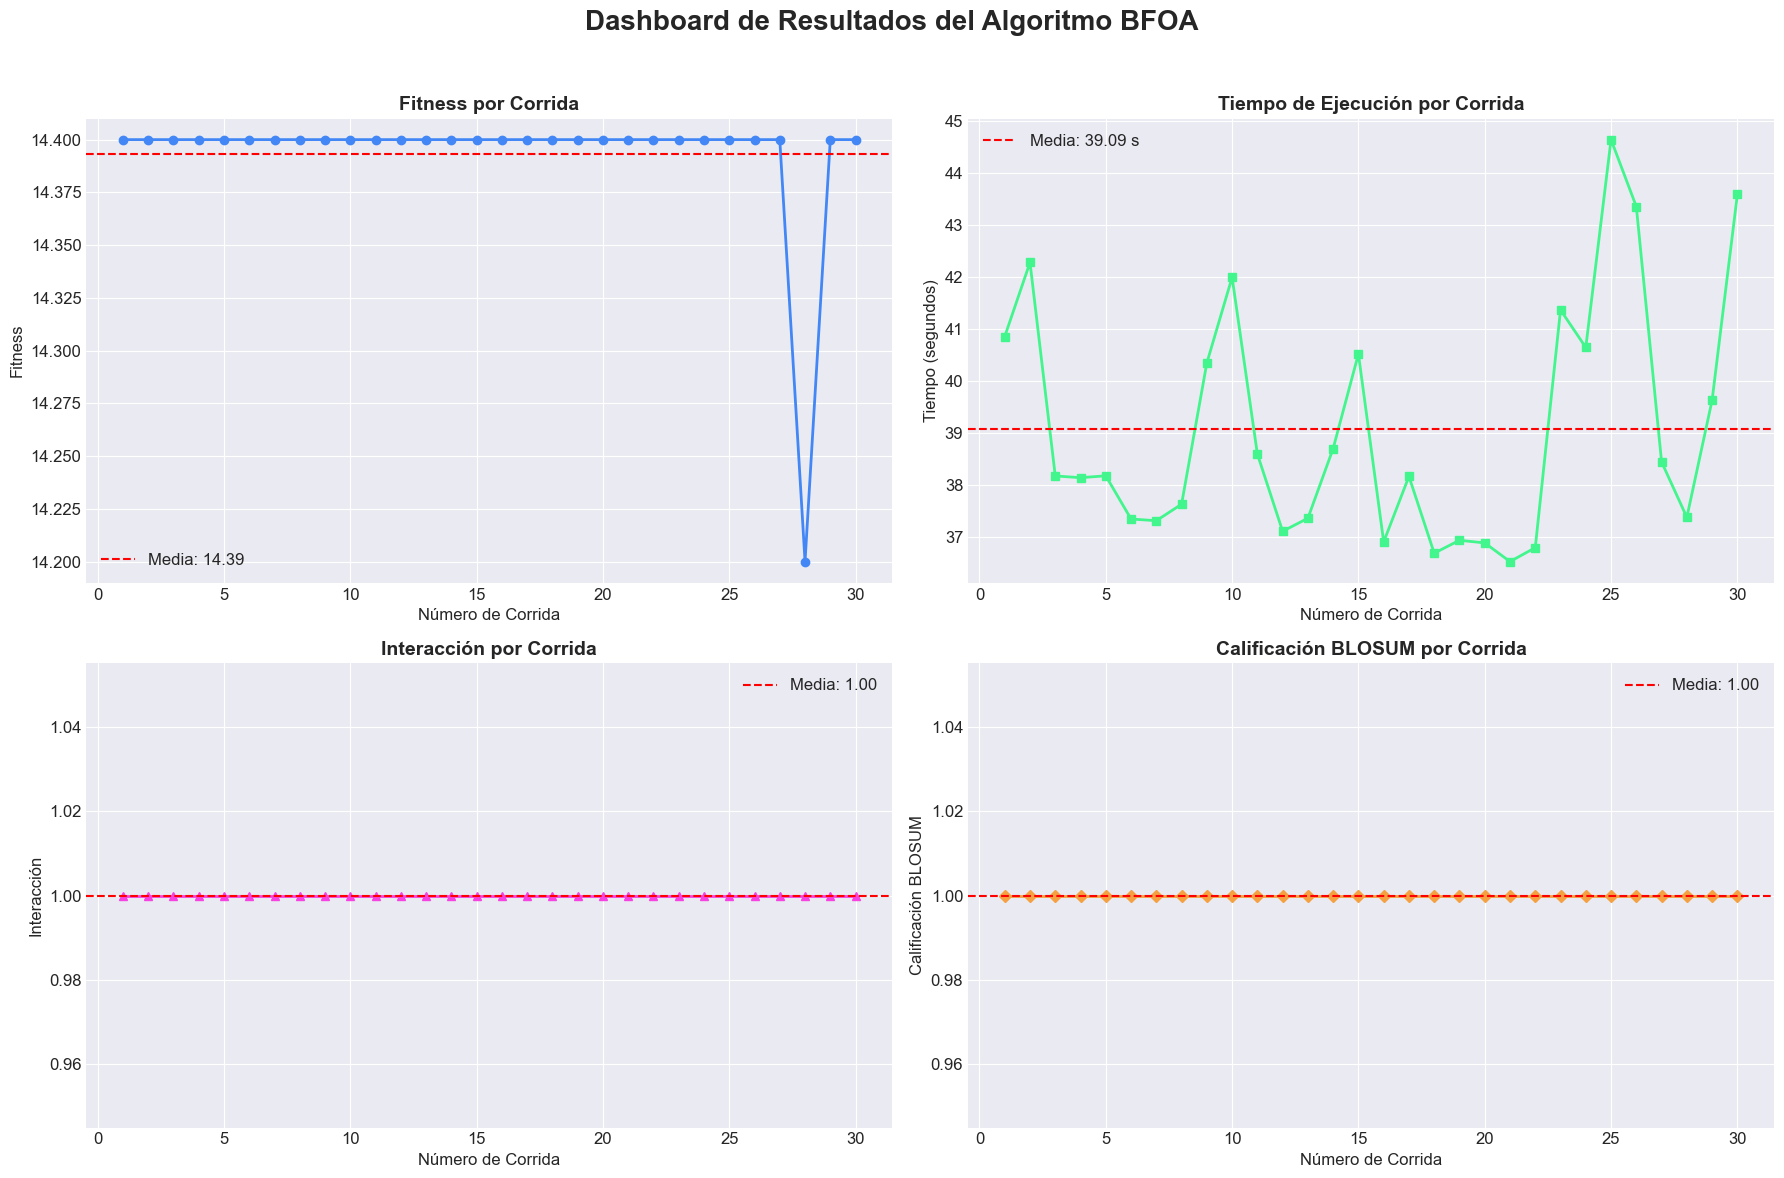

In [22]:
# Crear un dashboard con múltiples gráficas
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Dashboard de Resultados del Algoritmo BFOA', fontsize=20, fontweight='bold', y=0.98)

# Gráfica 1: Fitness
axs[0, 0].plot(df['corrida'], df['fitness'], marker='o', linestyle='-', linewidth=2, color='#4287f5')
axs[0, 0].axhline(y=df['fitness'].mean(), color='red', linestyle='--', 
                  label=f'Media: {df["fitness"].mean():.2f}')
axs[0, 0].set_title('Fitness por Corrida', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Número de Corrida')
axs[0, 0].set_ylabel('Fitness')
axs[0, 0].grid(True)
axs[0, 0].legend()

# Gráfica 2: Tiempo de ejecución
axs[0, 1].plot(df['corrida'], df['tiempo_ejecucion'], marker='s', linestyle='-', linewidth=2, color='#42f58d')
axs[0, 1].axhline(y=df['tiempo_ejecucion'].mean(), color='red', linestyle='--', 
                  label=f'Media: {df["tiempo_ejecucion"].mean():.2f} s')
axs[0, 1].set_title('Tiempo de Ejecución por Corrida', fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Número de Corrida')
axs[0, 1].set_ylabel('Tiempo (segundos)')
axs[0, 1].grid(True)
axs[0, 1].legend()

# Gráfica 3: Interacción
axs[1, 0].plot(df['corrida'], df['interaccion'], marker='^', linestyle='-', linewidth=2, color='#f542e0')
axs[1, 0].axhline(y=df['interaccion'].mean(), color='red', linestyle='--', 
                  label=f'Media: {df["interaccion"].mean():.2f}')
axs[1, 0].set_title('Interacción por Corrida', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Número de Corrida')
axs[1, 0].set_ylabel('Interacción')
axs[1, 0].grid(True)
axs[1, 0].legend()

# Gráfica 4: Calificación BLOSUM
axs[1, 1].plot(df['corrida'], df['calificacion_blosum'], marker='D', linestyle='-', linewidth=2, color='#f5a142')
axs[1, 1].axhline(y=df['calificacion_blosum'].mean(), color='red', linestyle='--', 
                  label=f'Media: {df["calificacion_blosum"].mean():.2f}')
axs[1, 1].set_title('Calificación BLOSUM por Corrida', fontsize=14, fontweight='bold')
axs[1, 1].set_xlabel('Número de Corrida')
axs[1, 1].set_ylabel('Calificación BLOSUM')
axs[1, 1].grid(True)
axs[1, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('dashboard_resultados.png', dpi=300)
plt.show()

Análisis de Rendimiento

In [23]:
# Estadísticas descriptivas de los resultados
estadisticas = df.describe().T
estadisticas['rango'] = estadisticas['max'] - estadisticas['min']
estadisticas['coef_variacion'] = (estadisticas['std'] / estadisticas['mean']) * 100

# Mostrar estadísticas redondeadas a 2 decimales
estadisticas.round(2)

,count,mean,std,min,25%,50%,75%,max,rango,coef_variacion
corrida,30.0,15.50,8.80,1.00,8.25,15.50,22.75,30.00,29.0,56.80
fitness,30.0,14.39,0.04,14.20,14.40,14.40,14.40,14.40,0.2,0.25
tiempo_ejecucion,30.0,39.09,2.32,36.53,37.33,38.18,40.62,44.64,8.1,5.94
interaccion,30.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.0,0.00
calificacion_blosum,30.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00,0.0,0.00


Gráfica Final de Rendimiento

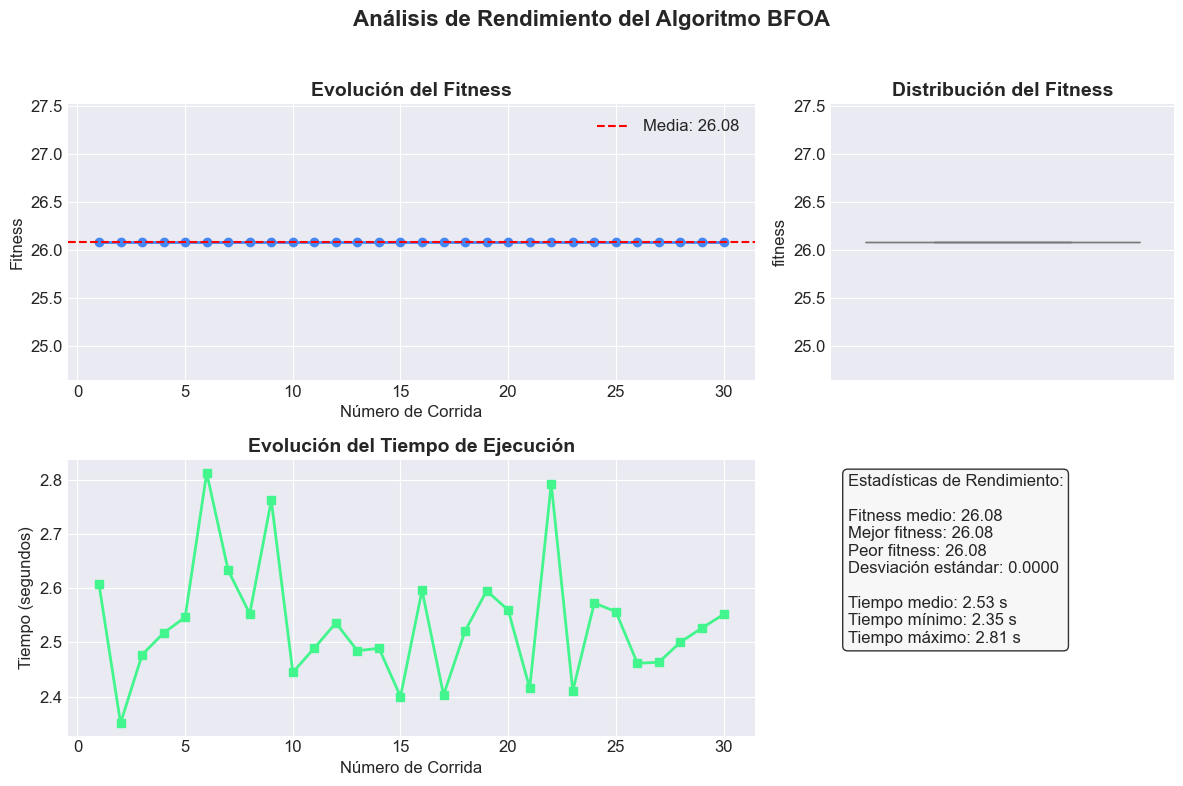

In [3]:
# Gráfica final con resultados del rendimiento del algoritmo
plt.figure(figsize=(12, 8))

# Crear subplots
gs = plt.GridSpec(2, 2, width_ratios=[2, 1], height_ratios=[1, 1])

# Gráfica principal: Evolución del fitness
ax1 = plt.subplot(gs[0, 0])
ax1.plot(df['corrida'], df['fitness'], marker='o', linestyle='-', linewidth=2, color='#4287f5')
ax1.axhline(y=df['fitness'].mean(), color='red', linestyle='--', label=f'Media: {df["fitness"].mean():.2f}')
ax1.set_title('Evolución del Fitness', fontsize=14, fontweight='bold')
ax1.set_xlabel('Número de Corrida')
ax1.set_ylabel('Fitness')
ax1.grid(True)
ax1.legend()

# Boxplot del fitness
ax2 = plt.subplot(gs[0, 1])
sns.boxplot(y=df['fitness'], ax=ax2, color='lightblue')
ax2.set_title('Distribución del Fitness', fontsize=14, fontweight='bold')
ax2.grid(True, axis='y')

# Evolución del tiempo de ejecución
ax3 = plt.subplot(gs[1, 0])
ax3.plot(df['corrida'], df['tiempo_ejecucion'], marker='s', linestyle='-', linewidth=2, color='#42f58d')
ax3.set_title('Evolución del Tiempo de Ejecución', fontsize=14, fontweight='bold')
ax3.set_xlabel('Número de Corrida')
ax3.set_ylabel('Tiempo (segundos)')
ax3.grid(True)

# Tabla con estadísticas
ax4 = plt.subplot(gs[1, 1])
ax4.axis('off')
stats_text = (
    f"Estadísticas de Rendimiento:\n\n"
    f"Fitness medio: {df['fitness'].mean():.2f}\n"
    f"Mejor fitness: {df['fitness'].max():.2f}\n"
    f"Peor fitness: {df['fitness'].min():.2f}\n"
    f"Desviación estándar: {df['fitness'].std():.4f}\n\n"
    f"Tiempo medio: {df['tiempo_ejecucion'].mean():.2f} s\n"
    f"Tiempo mínimo: {df['tiempo_ejecucion'].min():.2f} s\n"
    f"Tiempo máximo: {df['tiempo_ejecucion'].max():.2f} s"
)
ax4.text(0.05, 0.95, stats_text, transform=ax4.transAxes, fontsize=12, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='#f5f5f5', alpha=0.8))

plt.suptitle('Análisis de Rendimiento del Algoritmo BFOA', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('analisis_rendimiento.png', dpi=300)
plt.show()

C:\Users\luisa\AppData\Local\Temp\ipykernel_5688\173367015.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combinado, x='version', y='fitness', ax=ax2,


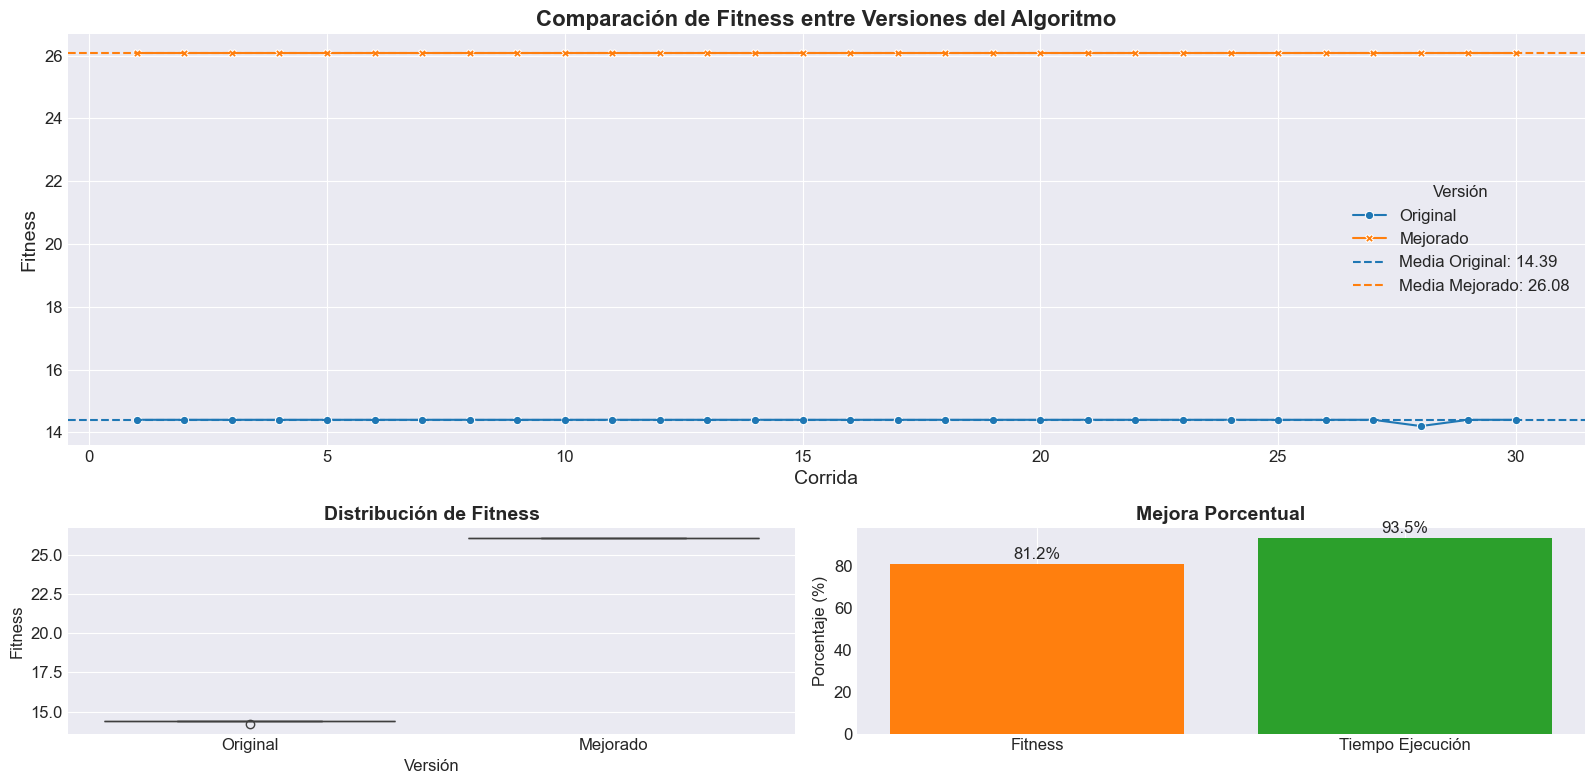

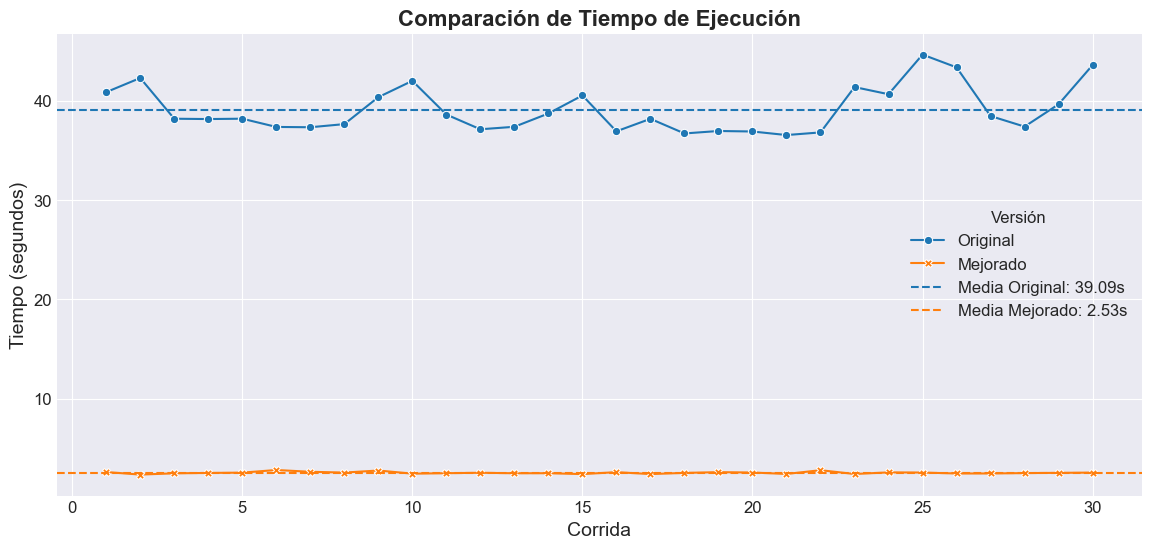

C:\Users\luisa\AppData\Local\Temp\ipykernel_5688\173367015.py:120: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=original_data, x='Componente', y='Valor', ax=ax1, palette='Blues')
C:\Users\luisa\AppData\Local\Temp\ipykernel_5688\173367015.py:136: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mejorado_data, x='Componente', y='Valor', ax=ax2, palette='Oranges')


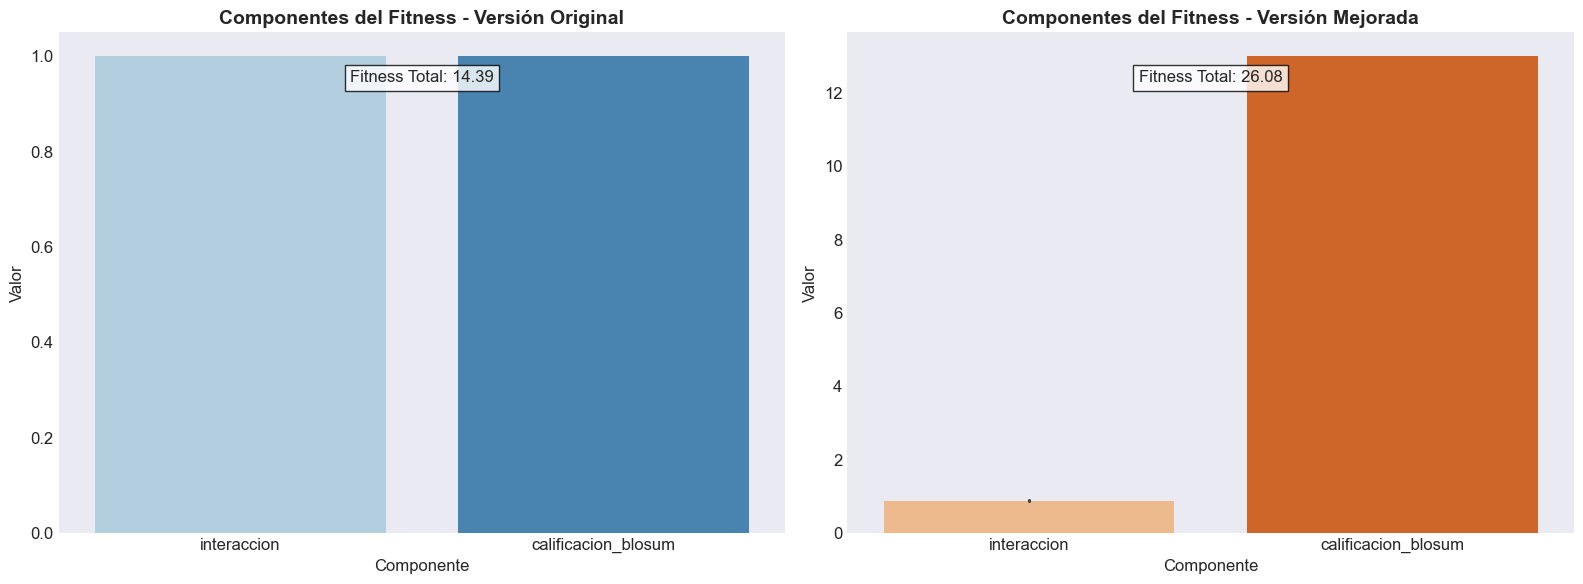

C:\Users\luisa\AppData\Local\Temp\ipykernel_5688\173367015.py:176: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combinado, x='version', y='fitness', ax=axs[1, 0],
C:\Users\luisa\AppData\Local\Temp\ipykernel_5688\173367015.py:183: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combinado, x='version', y='tiempo_ejecucion', ax=axs[1, 1],


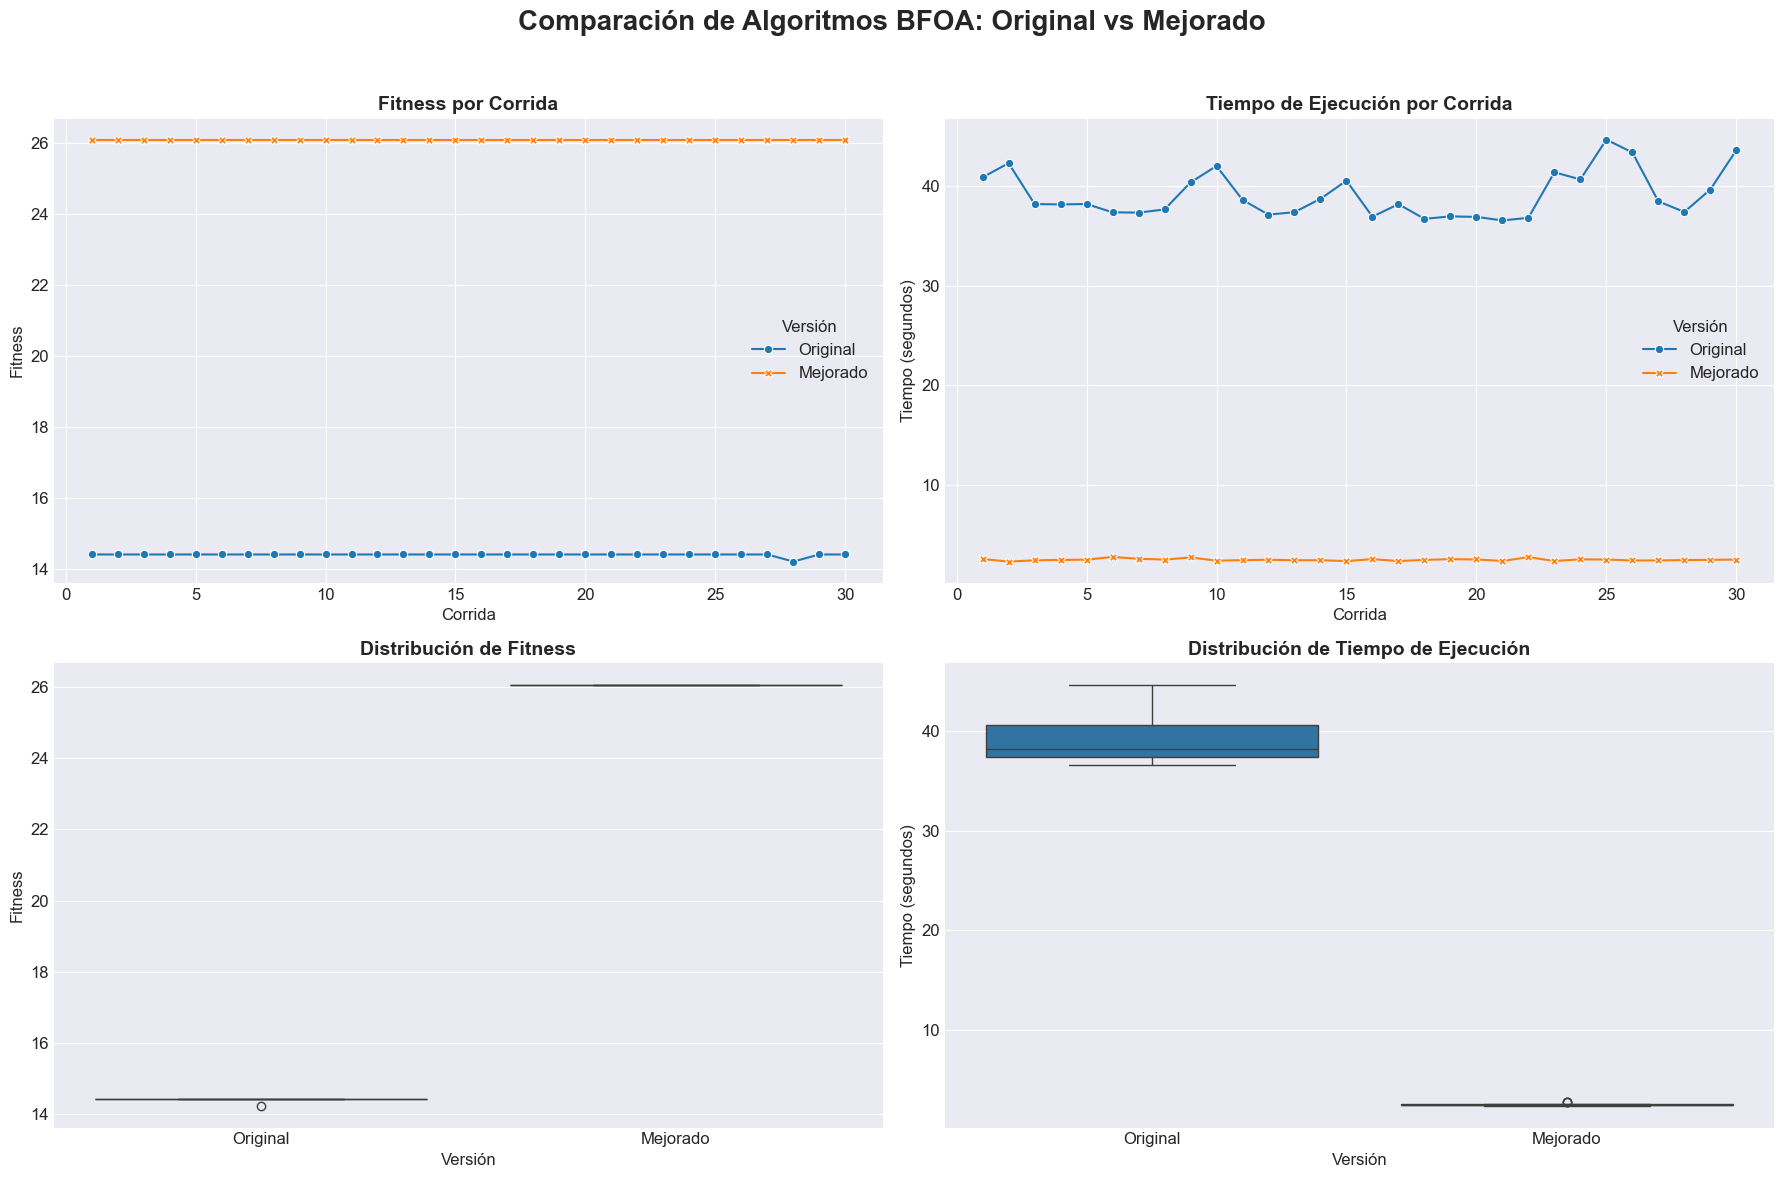


*** COMPARACIÓN ESTADÍSTICA ENTRE ALGORITMOS BFOA ***

             Métrica  Original  Mejorado  Diferencia  Cambio (%)
    Fitness Promedio    14.393    26.082      11.689       81.21
      Fitness Máximo    14.400    26.082      11.682       81.12
      Fitness Mínimo    14.200    26.082      11.882       83.68
 Tiempo Promedio (s)    39.087     2.534     -36.552      -93.52
   Tiempo Mínimo (s)    36.535     2.351     -34.183      -93.56
   Tiempo Máximo (s)    44.636     2.813     -41.824      -93.70
Interacción Promedio     1.000     0.887      -0.113      -11.33
     BLOSUM Promedio     1.000    13.000      12.000     1200.00

*** PRUEBAS ESTADÍSTICAS ***

Prueba t para Fitness: t=-1753.3000, p=0.00000000
Conclusión: Diferencia estadísticamente significativa

Prueba t para Tiempo: t=86.1509, p=0.00000000
Conclusión: Diferencia estadísticamente significativa


C:\Users\luisa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [4]:
# Comparación de resultados entre versión original y mejorada del algoritmo BFOA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Configurar el estilo visual
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 12

# Cargar los datos
df_original = pd.read_csv('resultados.csv')
df_mejorado = pd.read_csv('resultadosMejorados.csv')

# Añadir columna para identificar la versión
df_original['version'] = 'Original'
df_mejorado['version'] = 'Mejorado'

# Combinar ambos dataframes para análisis conjunto
df_combinado = pd.concat([df_original, df_mejorado], ignore_index=True)

# Calcular estadísticas descriptivas
stats_original = df_original.describe()
stats_mejorado = df_mejorado.describe()

# Crear dataframe para comparación de estadísticas
comparacion = pd.DataFrame({
    'Original': stats_original.loc['mean'],
    'Mejorado': stats_mejorado.loc['mean'],
})
comparacion.loc['mejora_absoluta'] = comparacion['Mejorado'] - comparacion['Original']
comparacion.loc['mejora_porcentual'] = (comparacion['Mejorado'] / comparacion['Original'] - 1) * 100

# 1. Comparación de Fitness
plt.figure(figsize=(16, 8))

# Crear un subplot grid de 2x2
gs = plt.GridSpec(2, 2, height_ratios=[2, 1])

# Gráfico principal: Líneas de fitness
ax1 = plt.subplot(gs[0, :])
sns.lineplot(data=df_combinado, x='corrida', y='fitness', hue='version', 
             style='version', markers=True, dashes=False, ax=ax1,
             palette={'Original': '#1f77b4', 'Mejorado': '#ff7f0e'})

# Añadir líneas de medias
ax1.axhline(y=df_original['fitness'].mean(), color='#1f77b4', linestyle='--', 
           label=f'Media Original: {df_original["fitness"].mean():.2f}')
ax1.axhline(y=df_mejorado['fitness'].mean(), color='#ff7f0e', linestyle='--', 
           label=f'Media Mejorado: {df_mejorado["fitness"].mean():.2f}')

ax1.set_title('Comparación de Fitness entre Versiones del Algoritmo', fontsize=16, fontweight='bold')
ax1.set_xlabel('Corrida', fontsize=14)
ax1.set_ylabel('Fitness', fontsize=14)
ax1.legend(title='Versión', fontsize=12)
ax1.grid(True)

# Boxplot de fitness
ax2 = plt.subplot(gs[1, 0])
sns.boxplot(data=df_combinado, x='version', y='fitness', ax=ax2,
            palette={'Original': '#1f77b4', 'Mejorado': '#ff7f0e'})
ax2.set_title('Distribución de Fitness', fontsize=14, fontweight='bold')
ax2.set_xlabel('Versión', fontsize=12)
ax2.set_ylabel('Fitness', fontsize=12)

# Barras de mejora porcentual
ax3 = plt.subplot(gs[1, 1])
improvement = (df_mejorado['fitness'].mean() / df_original['fitness'].mean() - 1) * 100
time_reduction = (1 - df_mejorado['tiempo_ejecucion'].mean() / df_original['tiempo_ejecucion'].mean()) * 100

metrics = ['Fitness', 'Tiempo Ejecución']
values = [improvement, time_reduction]
colors = ['#ff7f0e', '#2ca02c']

bars = ax3.bar(metrics, values, color=colors)
ax3.set_title('Mejora Porcentual', fontsize=14, fontweight='bold')
ax3.set_ylabel('Porcentaje (%)', fontsize=12)
ax3.grid(axis='y')

# Añadir etiquetas
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.savefig('comparacion_fitness.png', dpi=300)
plt.show()

# 2. Comparación de Tiempo de Ejecución
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_combinado, x='corrida', y='tiempo_ejecucion', hue='version', 
             style='version', markers=True, dashes=False,
             palette={'Original': '#1f77b4', 'Mejorado': '#ff7f0e'})

plt.axhline(y=df_original['tiempo_ejecucion'].mean(), color='#1f77b4', linestyle='--', 
           label=f'Media Original: {df_original["tiempo_ejecucion"].mean():.2f}s')
plt.axhline(y=df_mejorado['tiempo_ejecucion'].mean(), color='#ff7f0e', linestyle='--', 
           label=f'Media Mejorado: {df_mejorado["tiempo_ejecucion"].mean():.2f}s')

plt.title('Comparación de Tiempo de Ejecución', fontsize=16, fontweight='bold')
plt.xlabel('Corrida', fontsize=14)
plt.ylabel('Tiempo (segundos)', fontsize=14)
plt.legend(title='Versión')
plt.grid(True)
plt.savefig('comparacion_tiempo.png', dpi=300)
plt.show()

# 3. Análisis de Componentes: BLOSUM e Interacción
plt.figure(figsize=(16, 6))

# Componentes del algoritmo original
ax1 = plt.subplot(1, 2, 1)
original_data = pd.melt(df_original, id_vars=['corrida', 'version'], 
                        value_vars=['interaccion', 'calificacion_blosum'], 
                        var_name='Componente', value_name='Valor')
sns.barplot(data=original_data, x='Componente', y='Valor', ax=ax1, palette='Blues')
ax1.set_title('Componentes del Fitness - Versión Original', fontsize=14, fontweight='bold')
ax1.set_ylabel('Valor', fontsize=12)
ax1.grid(axis='y')

# Añadir la suma de componentes para fitness
sum_original = df_original['interaccion'].mean() + df_original['calificacion_blosum'].mean()
ax1.text(0.5, 0.9, f'Fitness Total: {df_original["fitness"].mean():.2f}', 
         horizontalalignment='center', transform=ax1.transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8))

# Componentes del algoritmo mejorado
ax2 = plt.subplot(1, 2, 2)
mejorado_data = pd.melt(df_mejorado, id_vars=['corrida', 'version'], 
                        value_vars=['interaccion', 'calificacion_blosum'], 
                        var_name='Componente', value_name='Valor')
sns.barplot(data=mejorado_data, x='Componente', y='Valor', ax=ax2, palette='Oranges')
ax2.set_title('Componentes del Fitness - Versión Mejorada', fontsize=14, fontweight='bold')
ax2.set_ylabel('Valor', fontsize=12)
ax2.grid(axis='y')

# Añadir la suma de componentes para fitness
sum_mejorado = df_mejorado['interaccion'].mean() + df_mejorado['calificacion_blosum'].mean()
ax2.text(0.5, 0.9, f'Fitness Total: {df_mejorado["fitness"].mean():.2f}', 
         horizontalalignment='center', transform=ax2.transAxes, fontsize=12,
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig('comparacion_componentes.png', dpi=300)
plt.show()

# 4. Dashboard de Comparación
fig, axs = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Comparación de Algoritmos BFOA: Original vs Mejorado', fontsize=20, fontweight='bold', y=0.98)

# Fitness
sns.lineplot(data=df_combinado, x='corrida', y='fitness', hue='version', 
             style='version', markers=True, dashes=False, ax=axs[0, 0],
             palette={'Original': '#1f77b4', 'Mejorado': '#ff7f0e'})
axs[0, 0].set_title('Fitness por Corrida', fontsize=14, fontweight='bold')
axs[0, 0].set_xlabel('Corrida')
axs[0, 0].set_ylabel('Fitness')
axs[0, 0].legend(title='Versión')
axs[0, 0].grid(True)

# Tiempo de ejecución
sns.lineplot(data=df_combinado, x='corrida', y='tiempo_ejecucion', hue='version', 
             style='version', markers=True, dashes=False, ax=axs[0, 1],
             palette={'Original': '#1f77b4', 'Mejorado': '#ff7f0e'})
axs[0, 1].set_title('Tiempo de Ejecución por Corrida', fontsize=14, fontweight='bold')
axs[0, 1].set_xlabel('Corrida')
axs[0, 1].set_ylabel('Tiempo (segundos)')
axs[0, 1].legend(title='Versión')
axs[0, 1].grid(True)

# Boxplots para fitness y tiempo
sns.boxplot(data=df_combinado, x='version', y='fitness', ax=axs[1, 0],
            palette={'Original': '#1f77b4', 'Mejorado': '#ff7f0e'})
axs[1, 0].set_title('Distribución de Fitness', fontsize=14, fontweight='bold')
axs[1, 0].set_xlabel('Versión')
axs[1, 0].set_ylabel('Fitness')
axs[1, 0].grid(True, axis='y')

sns.boxplot(data=df_combinado, x='version', y='tiempo_ejecucion', ax=axs[1, 1],
            palette={'Original': '#1f77b4', 'Mejorado': '#ff7f0e'})
axs[1, 1].set_title('Distribución de Tiempo de Ejecución', fontsize=14, fontweight='bold')
axs[1, 1].set_xlabel('Versión')
axs[1, 1].set_ylabel('Tiempo (segundos)')
axs[1, 1].grid(True, axis='y')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('dashboard_comparacion.png', dpi=300)
plt.show()

# 5. Tabla de Resumen
# Crear tabla de estadísticas comparativas
stats_comparison = pd.DataFrame({
    'Métrica': ['Fitness Promedio', 'Fitness Máximo', 'Fitness Mínimo', 
                'Tiempo Promedio (s)', 'Tiempo Mínimo (s)', 'Tiempo Máximo (s)',
                'Interacción Promedio', 'BLOSUM Promedio'],
    'Original': [df_original['fitness'].mean(), df_original['fitness'].max(), df_original['fitness'].min(),
                df_original['tiempo_ejecucion'].mean(), df_original['tiempo_ejecucion'].min(), df_original['tiempo_ejecucion'].max(),
                df_original['interaccion'].mean(), df_original['calificacion_blosum'].mean()],
    'Mejorado': [df_mejorado['fitness'].mean(), df_mejorado['fitness'].max(), df_mejorado['fitness'].min(),
                df_mejorado['tiempo_ejecucion'].mean(), df_mejorado['tiempo_ejecucion'].min(), df_mejorado['tiempo_ejecucion'].max(),
                df_mejorado['interaccion'].mean(), df_mejorado['calificacion_blosum'].mean()]
})

# Calcular diferencias absolutas y porcentuales
stats_comparison['Diferencia'] = stats_comparison['Mejorado'] - stats_comparison['Original']
stats_comparison['Cambio (%)'] = (stats_comparison['Mejorado'] / stats_comparison['Original'] - 1) * 100

# Formatear valores para mejor visualización
for col in ['Original', 'Mejorado', 'Diferencia']:
    stats_comparison[col] = stats_comparison[col].round(3)
stats_comparison['Cambio (%)'] = stats_comparison['Cambio (%)'].round(2)

# Mostrar la tabla de comparación
print("\n*** COMPARACIÓN ESTADÍSTICA ENTRE ALGORITMOS BFOA ***\n")
print(stats_comparison.to_string(index=False))

# Realizar pruebas estadísticas
print("\n*** PRUEBAS ESTADÍSTICAS ***\n")

# Prueba t para fitness
t_stat, p_value = stats.ttest_ind(df_original['fitness'], df_mejorado['fitness'])
print(f"Prueba t para Fitness: t={t_stat:.4f}, p={p_value:.8f}")
print(f"Conclusión: {'Diferencia estadísticamente significativa' if p_value < 0.05 else 'No hay diferencia significativa'}")

# Prueba t para tiempo de ejecución
t_stat, p_value = stats.ttest_ind(df_original['tiempo_ejecucion'], df_mejorado['tiempo_ejecucion'])
print(f"\nPrueba t para Tiempo: t={t_stat:.4f}, p={p_value:.8f}")
print(f"Conclusión: {'Diferencia estadísticamente significativa' if p_value < 0.05 else 'No hay diferencia significativa'}")

# Guardar la tabla de comparación en un archivo CSV
stats_comparison.to_csv('comparacion_estadistica.csv', index=False)

C:\Users\luisa\AppData\Local\Temp\ipykernel_5688\3455266361.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combinado, x='version', y='calificacion_blosum', ax=ax2,


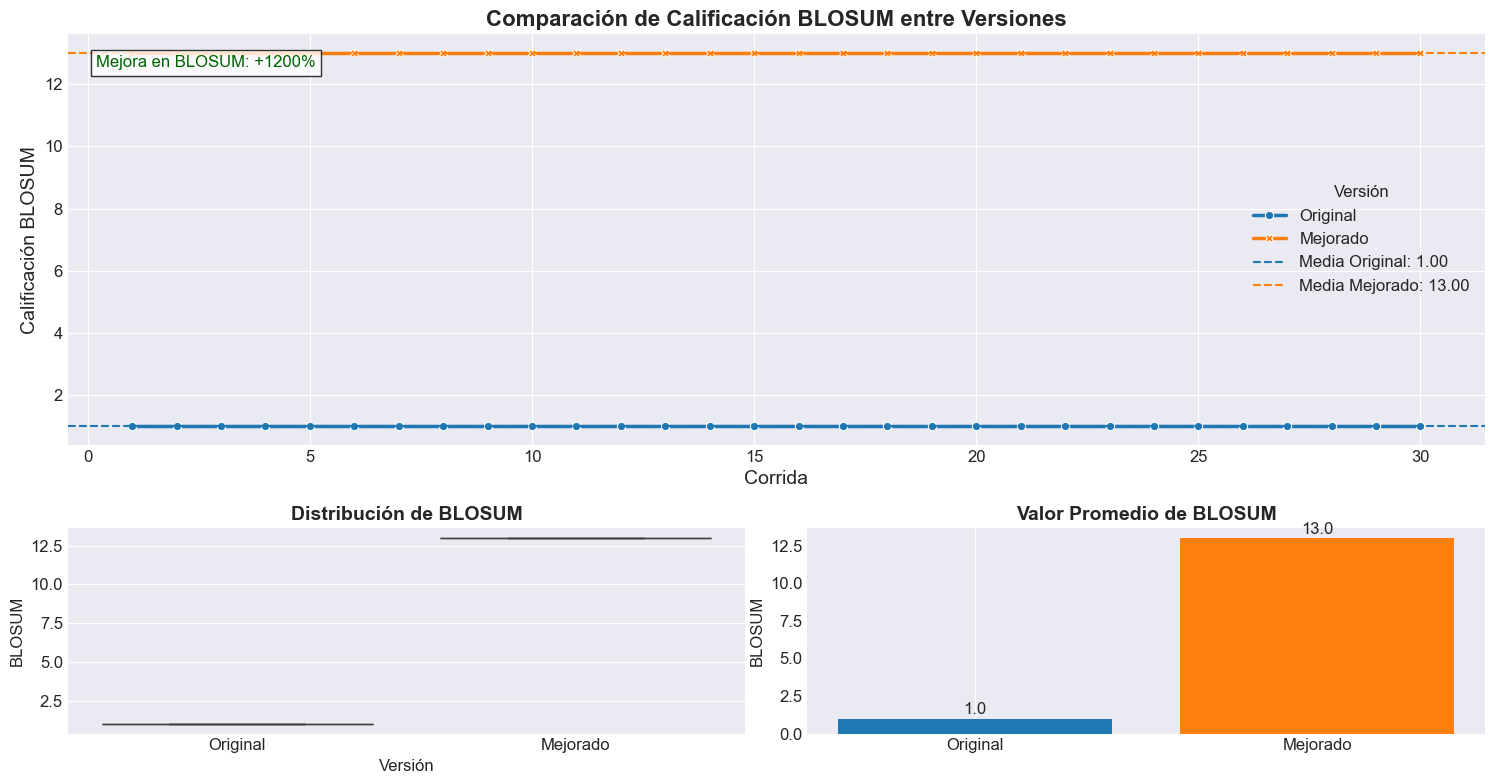

<Figure size 1400x700 with 0 Axes>

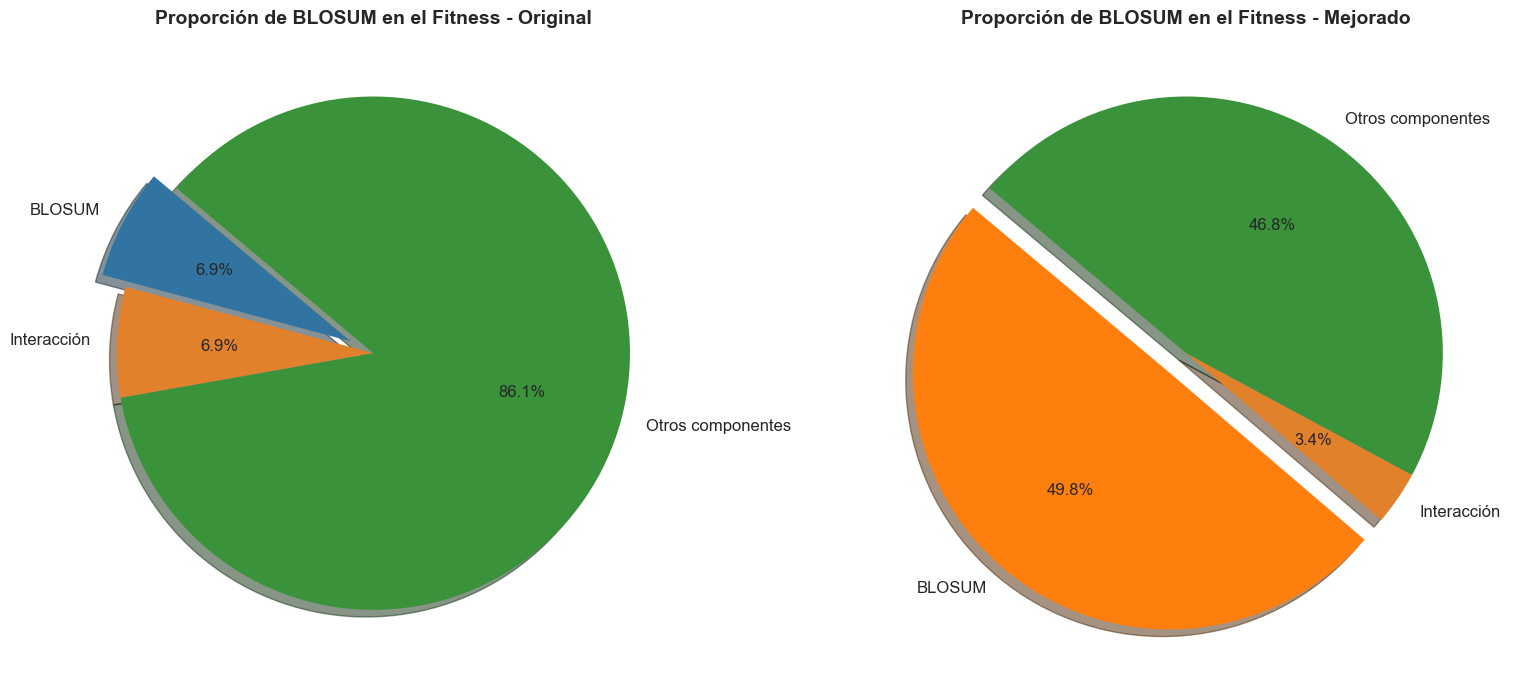

<Figure size 1000x600 with 0 Axes>

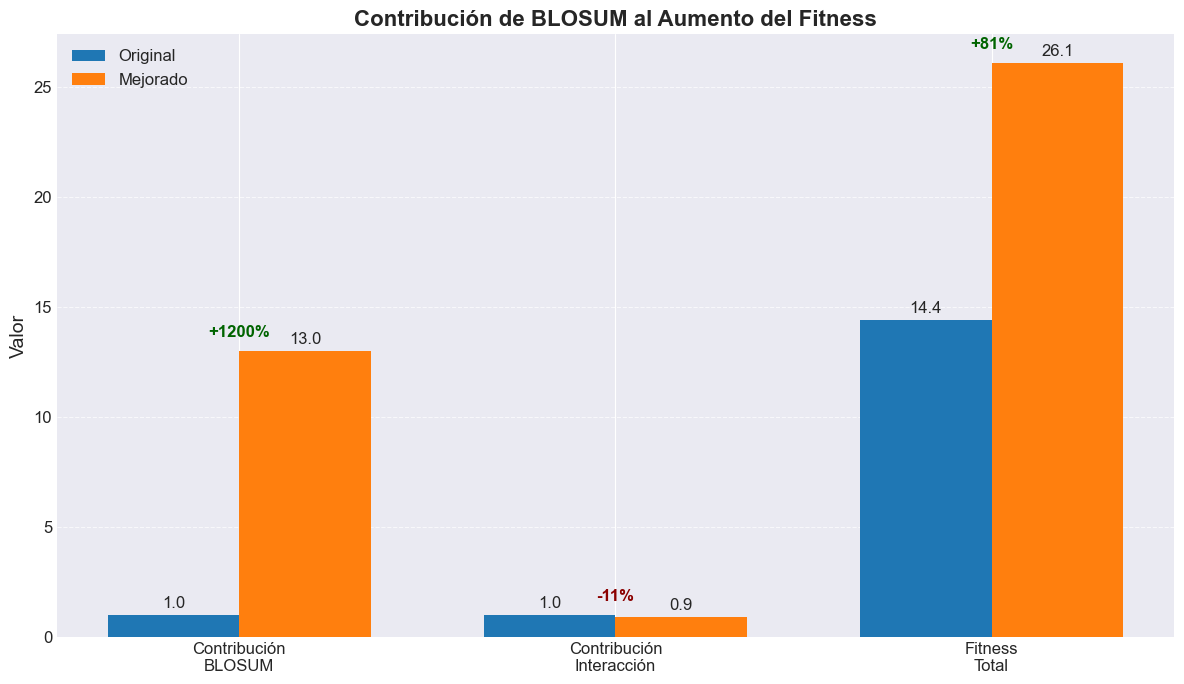

C:\Users\luisa\AppData\Local\Temp\ipykernel_5688\3455266361.py:179: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_combinado, x='version', y='calificacion_blosum', ax=ax_box,


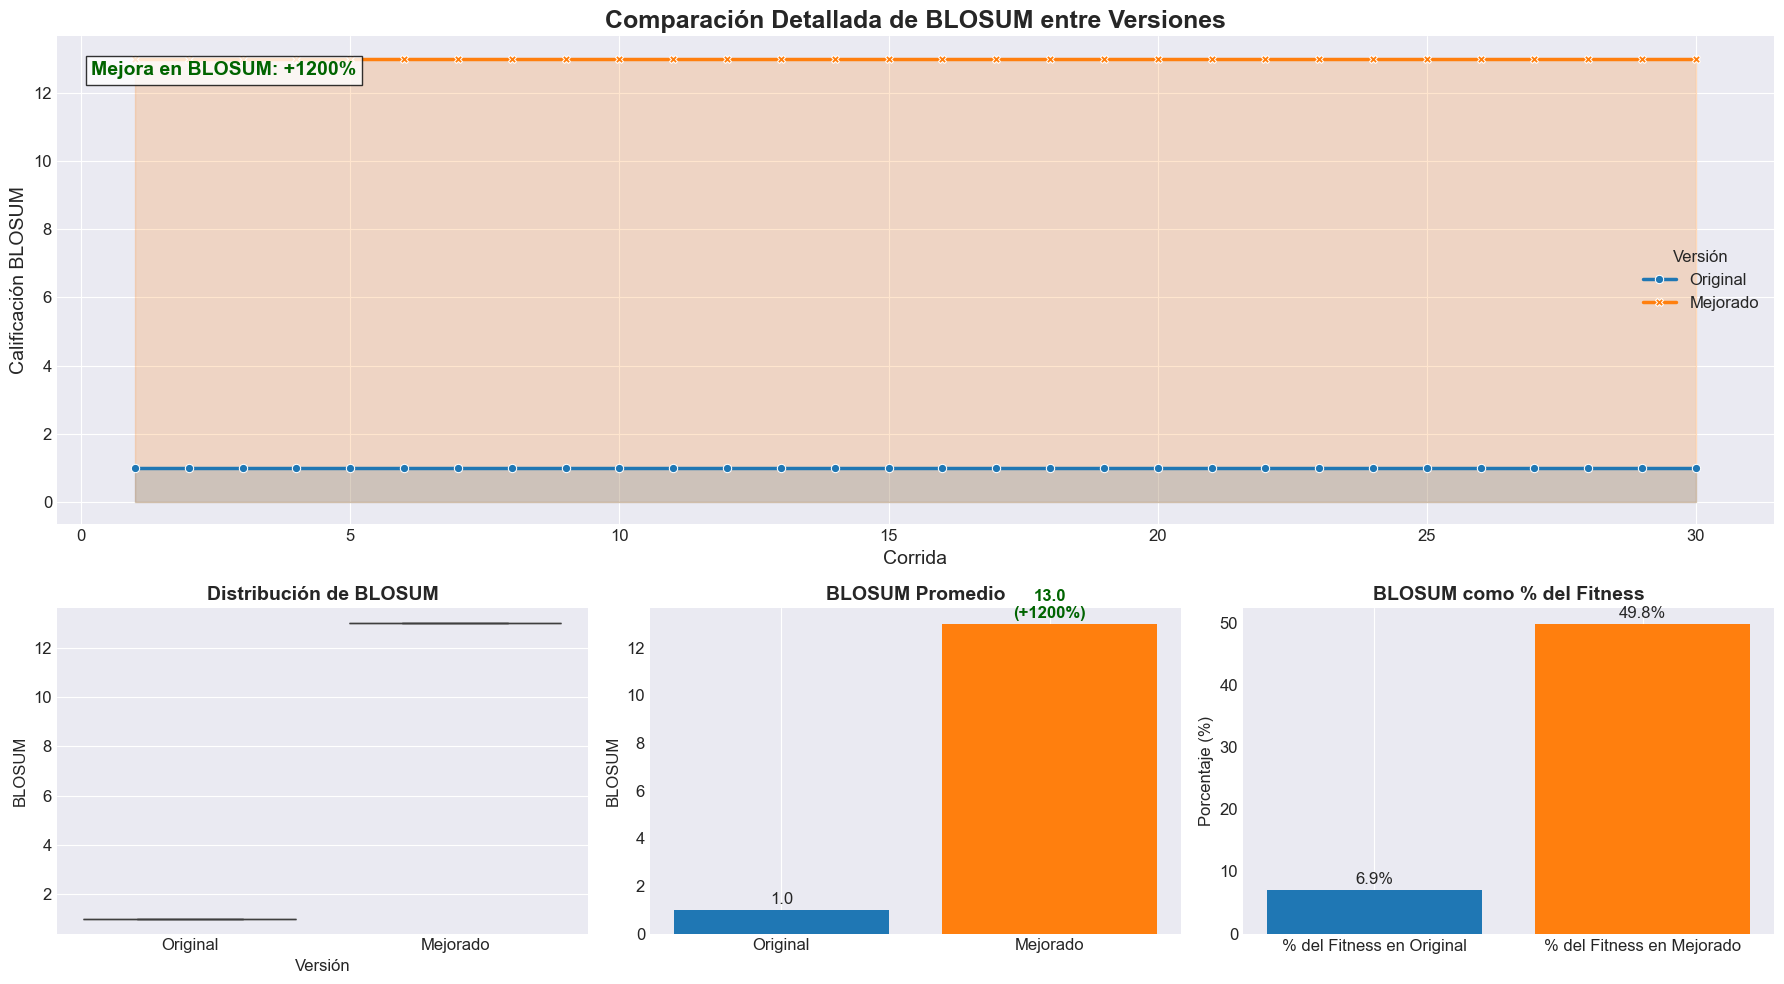

In [5]:
# Comparación específica de valores BLOSUM entre versiones
plt.figure(figsize=(15, 8))

# Crear subplot grid
gs = plt.GridSpec(2, 2, height_ratios=[2, 1])

# 1. Gráfico principal: Líneas de BLOSUM
ax1 = plt.subplot(gs[0, :])
sns.lineplot(data=df_combinado, x='corrida', y='calificacion_blosum', hue='version', 
             style='version', markers=True, dashes=False, ax=ax1,
             palette={'Original': '#1f77b4', 'Mejorado': '#ff7f0e'}, linewidth=2.5)

# Añadir líneas de medias
ax1.axhline(y=df_original['calificacion_blosum'].mean(), color='#1f77b4', linestyle='--', 
           label=f'Media Original: {df_original["calificacion_blosum"].mean():.2f}')
ax1.axhline(y=df_mejorado['calificacion_blosum'].mean(), color='#ff7f0e', linestyle='--', 
           label=f'Media Mejorado: {df_mejorado["calificacion_blosum"].mean():.2f}')

ax1.set_title('Comparación de Calificación BLOSUM entre Versiones', fontsize=16, fontweight='bold')
ax1.set_xlabel('Corrida', fontsize=14)
ax1.set_ylabel('Calificación BLOSUM', fontsize=14)
ax1.legend(title='Versión', fontsize=12)
ax1.grid(True)

# Añadir texto de mejora
blosum_improvement = (df_mejorado['calificacion_blosum'].mean() / df_original['calificacion_blosum'].mean() - 1) * 100
ax1.text(0.02, 0.92, f'Mejora en BLOSUM: +{blosum_improvement:.0f}%', transform=ax1.transAxes, 
         bbox=dict(facecolor='white', alpha=0.8), fontsize=12, color='darkgreen')

# 2. Boxplot de BLOSUM
ax2 = plt.subplot(gs[1, 0])
sns.boxplot(data=df_combinado, x='version', y='calificacion_blosum', ax=ax2,
            palette={'Original': '#1f77b4', 'Mejorado': '#ff7f0e'})
ax2.set_title('Distribución de BLOSUM', fontsize=14, fontweight='bold')
ax2.set_xlabel('Versión', fontsize=12)
ax2.set_ylabel('BLOSUM', fontsize=12)
ax2.grid(True, axis='y')

# 3. Gráfico de barras para comparación directa
ax3 = plt.subplot(gs[1, 1])
versions = ['Original', 'Mejorado']
blosum_values = [df_original['calificacion_blosum'].mean(), df_mejorado['calificacion_blosum'].mean()]
bars = ax3.bar(versions, blosum_values, color=['#1f77b4', '#ff7f0e'])
ax3.set_title('Valor Promedio de BLOSUM', fontsize=14, fontweight='bold')
ax3.set_ylabel('BLOSUM', fontsize=12)
ax3.grid(axis='y')

# Añadir etiquetas a las barras
for bar in bars:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.savefig('comparacion_blosum.png', dpi=300)
plt.show()

# Gráfico de proporciones BLOSUM vs Total
plt.figure(figsize=(14, 7))

# Configurar subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))

# Versión Original - Gráfico de pastel
labels_original = ['BLOSUM', 'Interacción', 'Otros componentes']
blosum_ratio_original = df_original['calificacion_blosum'].mean() / df_original['fitness'].mean() * 100
inter_ratio_original = df_original['interaccion'].mean() / df_original['fitness'].mean() * 100
other_ratio_original = 100 - blosum_ratio_original - inter_ratio_original

sizes_original = [blosum_ratio_original, inter_ratio_original, other_ratio_original]
colors_original = ['#3274A1', '#E1812C', '#3A923A']
explode_original = (0.1, 0, 0)  # explode the BLOSUM slice

ax1.pie(sizes_original, explode=explode_original, labels=labels_original, colors=colors_original,
       autopct='%1.1f%%', shadow=True, startangle=140)
ax1.set_title('Proporción de BLOSUM en el Fitness - Original', fontsize=14, fontweight='bold')

# Versión Mejorada - Gráfico de pastel
labels_mejorado = ['BLOSUM', 'Interacción', 'Otros componentes']
blosum_ratio_mejorado = df_mejorado['calificacion_blosum'].mean() / df_mejorado['fitness'].mean() * 100
inter_ratio_mejorado = df_mejorado['interaccion'].mean() / df_mejorado['fitness'].mean() * 100
other_ratio_mejorado = 100 - blosum_ratio_mejorado - inter_ratio_mejorado

sizes_mejorado = [blosum_ratio_mejorado, inter_ratio_mejorado, other_ratio_mejorado]
colors_mejorado = ['#FF7F0E', '#E1812C', '#3A923A']
explode_mejorado = (0.1, 0, 0)  # explode the BLOSUM slice

ax2.pie(sizes_mejorado, explode=explode_mejorado, labels=labels_mejorado, colors=colors_mejorado,
       autopct='%1.1f%%', shadow=True, startangle=140)
ax2.set_title('Proporción de BLOSUM en el Fitness - Mejorado', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('proporcion_blosum.png', dpi=300)
plt.show()

# Análisis de la contribución de BLOSUM al aumento del fitness
plt.figure(figsize=(10, 6))

labels = ['Contribución\nBLOSUM', 'Contribución\nInteracción', 'Fitness\nTotal']
original_values = [df_original['calificacion_blosum'].mean(), df_original['interaccion'].mean(), df_original['fitness'].mean()]
mejorado_values = [df_mejorado['calificacion_blosum'].mean(), df_mejorado['interaccion'].mean(), df_mejorado['fitness'].mean()]

x = np.arange(len(labels))  # Posiciones para las barras
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, original_values, width, label='Original', color='#1f77b4')
rects2 = ax.bar(x + width/2, mejorado_values, width, label='Mejorado', color='#ff7f0e')

# Añadir texto de mejora porcentual sobre las barras
for i, (orig, mej) in enumerate(zip(original_values, mejorado_values)):
    improvement = (mej / orig - 1) * 100
    if improvement > 0:
        ax.text(i, max(orig, mej) + 0.5, f'+{improvement:.0f}%', 
                ha='center', va='bottom', color='darkgreen', fontweight='bold')
    else:
        ax.text(i, max(orig, mej) + 0.5, f'{improvement:.0f}%', 
                ha='center', va='bottom', color='darkred', fontweight='bold')

# Personalizar gráfico
ax.set_ylabel('Valor', fontsize=14)
ax.set_title('Contribución de BLOSUM al Aumento del Fitness', fontsize=16, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(fontsize=12)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas en las barras
for rect in rects1:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}',
                xy=(rect.get_x() + rect.get_width()/2, height),
                xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                textcoords="offset points",
                ha='center', va='bottom')

for rect in rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.1f}',
                xy=(rect.get_x() + rect.get_width()/2, height),
                xytext=(0, 3),  # 3 puntos de desplazamiento vertical
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.savefig('contribucion_blosum.png', dpi=300)
plt.show()

# Análisis detallado de BLOSUM - Comparación conjunta
plt.figure(figsize=(18, 10))

# Crear grid de subplots
gs = plt.GridSpec(2, 3, figure=plt.gcf(), height_ratios=[1.5, 1])

# 1. Gráfico principal: Líneas de BLOSUM con área
ax_main = plt.subplot(gs[0, :])
sns.lineplot(data=df_combinado, x='corrida', y='calificacion_blosum', hue='version', 
             style='version', markers=True, dashes=False, ax=ax_main,
             palette={'Original': '#1f77b4', 'Mejorado': '#ff7f0e'}, linewidth=2.5)

# Añadir áreas sombreadas
plt.fill_between(df_original['corrida'], 0, df_original['calificacion_blosum'], 
                 alpha=0.2, color='#1f77b4', label='_nolegend_')
plt.fill_between(df_mejorado['corrida'], 0, df_mejorado['calificacion_blosum'], 
                 alpha=0.2, color='#ff7f0e', label='_nolegend_')

ax_main.set_title('Comparación Detallada de BLOSUM entre Versiones', fontsize=18, fontweight='bold')
ax_main.set_xlabel('Corrida', fontsize=14)
ax_main.set_ylabel('Calificación BLOSUM', fontsize=14)
ax_main.legend(title='Versión', fontsize=12)
ax_main.grid(True)

# Añadir texto de mejora
ax_main.text(0.02, 0.92, f'Mejora en BLOSUM: +{blosum_improvement:.0f}%', transform=ax_main.transAxes, 
             bbox=dict(facecolor='white', alpha=0.8), fontsize=14, color='darkgreen', fontweight='bold')

# 2. Boxplot comparativo
ax_box = plt.subplot(gs[1, 0])
sns.boxplot(data=df_combinado, x='version', y='calificacion_blosum', ax=ax_box,
            palette={'Original': '#1f77b4', 'Mejorado': '#ff7f0e'})
ax_box.set_title('Distribución de BLOSUM', fontsize=14, fontweight='bold')
ax_box.set_xlabel('Versión', fontsize=12)
ax_box.set_ylabel('BLOSUM', fontsize=12)
ax_box.grid(True, axis='y')

# 3. Barras de promedio
ax_bar = plt.subplot(gs[1, 1])
versions = ['Original', 'Mejorado']
blosum_values = [df_original['calificacion_blosum'].mean(), df_mejorado['calificacion_blosum'].mean()]
bars = ax_bar.bar(versions, blosum_values, color=['#1f77b4', '#ff7f0e'])
ax_bar.set_title('BLOSUM Promedio', fontsize=14, fontweight='bold')
ax_bar.set_ylabel('BLOSUM', fontsize=12)
ax_bar.grid(axis='y')

# Añadir etiquetas con mejora porcentual
for i, bar in enumerate(bars):
    height = bar.get_height()
    if i == 0:
        ax_bar.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                 f'{height:.1f}', ha='center', va='bottom', fontsize=12)
    else:
        ax_bar.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                 f'{height:.1f}\n(+{blosum_improvement:.0f}%)', ha='center', va='bottom', 
                 fontsize=12, color='darkgreen', fontweight='bold')

# 4. Porcentaje del fitness
ax_pie = plt.subplot(gs[1, 2])
labels = ['% del Fitness en Original', '% del Fitness en Mejorado']
blosum_pct_values = [blosum_ratio_original, blosum_ratio_mejorado]
bars_pct = ax_pie.bar(labels, blosum_pct_values, color=['#1f77b4', '#ff7f0e'])
ax_pie.set_title('BLOSUM como % del Fitness', fontsize=14, fontweight='bold')
ax_pie.set_ylabel('Porcentaje (%)', fontsize=12)
ax_pie.grid(axis='y')

# Añadir etiquetas con valores
for i, bar in enumerate(bars_pct):
    height = bar.get_height()
    ax_pie.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.savefig('analisis_detallado_blosum.png', dpi=300)
plt.show()

In [2]:
print(chr(sum(range(ord(min(str(not())))))))

ඞ
